<a href="https://colab.research.google.com/github/dhwlxor/My-Ropo/blob/main/%EA%B2%AC%EC%A2%85%EC%9D%B8%EC%8B%9D_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 포메리아.jpg to 포메리아 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


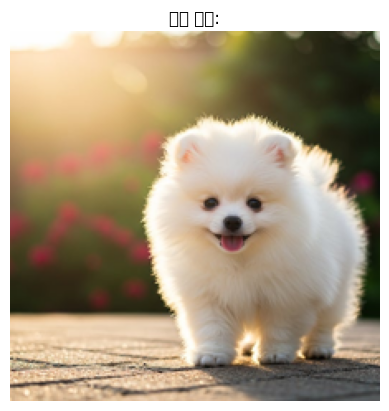

🐶 상위 5개 견종 예측:
1. affenpinscher (4.86%)
2. miniature_poodle (2.67%)
3. Rhodesian_ridgeback (2.41%)
4. toy_poodle (2.39%)
5. Lhasa (1.96%)


In [ ]:
from google.colab import files
from PIL import Image
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt

# 모델과 클래스 불러오기
model = tf.keras.models.load_model('2025254018.h5')
with open('dog_species_names.pkl', 'rb') as f:
    dog_species = pickle.load(f)

# 파일 업로드
uploaded = files.upload()

if len(uploaded) == 0:
    print("⚠️ 파일이 선택되지 않았습니다. 이미지를 반드시 업로드 해주세요.")
else:
    img_path = list(uploaded.keys())[0]
    img = Image.open(img_path).convert('RGB')
    img = img.resize((224, 224))

    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0]
    top5 = np.argsort(-pred)[:5]

    plt.imshow(img)
    plt.axis('off')
    plt.title('예측 결과:')
    plt.show()

    print("🐶 상위 5개 견종 예측:")
    for i in range(5):
        prob = f"{pred[top5[i]]*100:.2f}%"
        name = str(dog_species[top5[i]]).split('-')[1]
        print(f"{i+1}. {name} ({prob})")
